# Bachelorarbeit - Evaluierung und Vergleich der Front-End Technologien Angular und React
## Andreas Kappel, BSWE, 2010859008

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

### Reading the input file and drop empty entries

In [3]:
log_data = pd.read_csv('tti.csv')

In [4]:
log_data.dropna()

,app,time,unit
0,angular,565.176,millisecond
1,angular,560.124,millisecond
2,angular,562.400,millisecond
3,angular,558.092,millisecond
4,angular,561.568,millisecond
...,...,...,...
995,react,365.616,millisecond
996,react,364.557,millisecond
997,react,364.578,millisecond
998,react,365.574,millisecond


### Group by App and calculate min, max and average

In [5]:
angular = log_data.query("app == 'angular'")
react = log_data.query("app == 'react'")

a_sum = angular.agg({'time': ['min', 'max', 'mean', 'std', 'size']})
r_sum = react.agg({'time': ['min', 'max', 'mean', 'std', 'size']})

print('\nSummary Angular:')
display(a_sum)
print('\nSummary React')
display(r_sum)


Summary Angular:


,time
min,524.320000
max,579.672000
mean,554.130952
std,8.510663
size,500.000000



Summary React


,time
min,361.605000
max,454.169500
mean,366.335528
std,10.222722
size,500.000000


### Plot grouped dataframe as bar chart

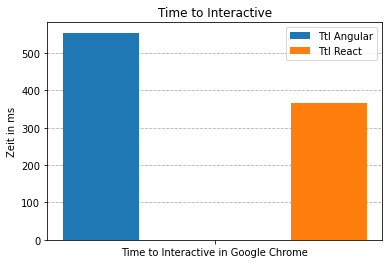

In [6]:
apps = ['Time to Interactive in Google Chrome']
x_axis = np.arange(len(apps))

a_val = [a_sum['time']['mean']]   
r_val = [r_sum['time']['mean']]

plt.bar(x_axis - 0.15, a_val, width=0.1, label='TtI Angular', zorder=10)
plt.bar(x_axis + 0.15, r_val, width=0.1, label='TtI React', zorder=10)

plt.grid(axis='y', linestyle='dashed', zorder=0)
plt.title("Time to Interactive")
plt.xticks(x_axis, apps, rotation=0)
plt.ylabel('Zeit in ms')
plt.legend()

plt.savefig(f"./charts/plot_tti.png", bbox_inches="tight", transparent=True)